4. Напишите скрипт на Python, получающий данные из HTML таблицы с данными по рождаемости в России (ссылка ниже) и визуализируйте их на графике. Готовый файл в формате .ipynb загрузите на любой файлообменник, а в поле ответа укажите ссылку.

In [37]:
import requests
import urllib3
import pandas as pd

urllib3.disable_warnings()

URL = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'

In [38]:
try:
    response = requests.get(URL,verify=False)
except Exception as e:
    print('Error, description:', e)

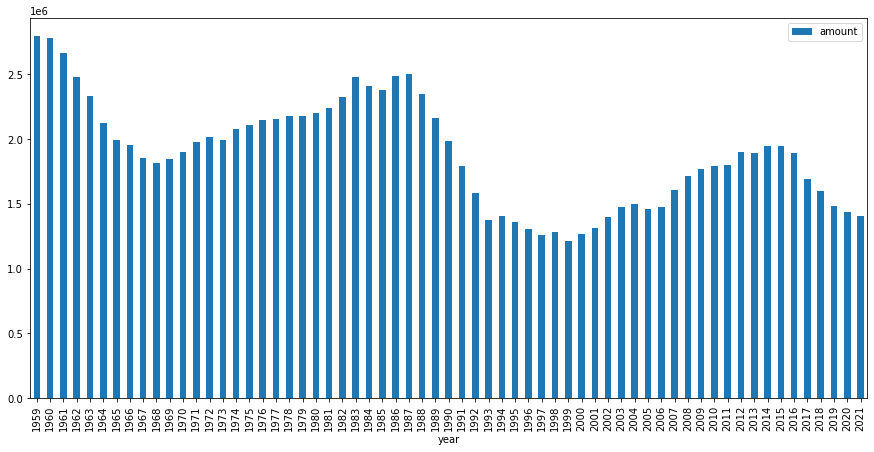

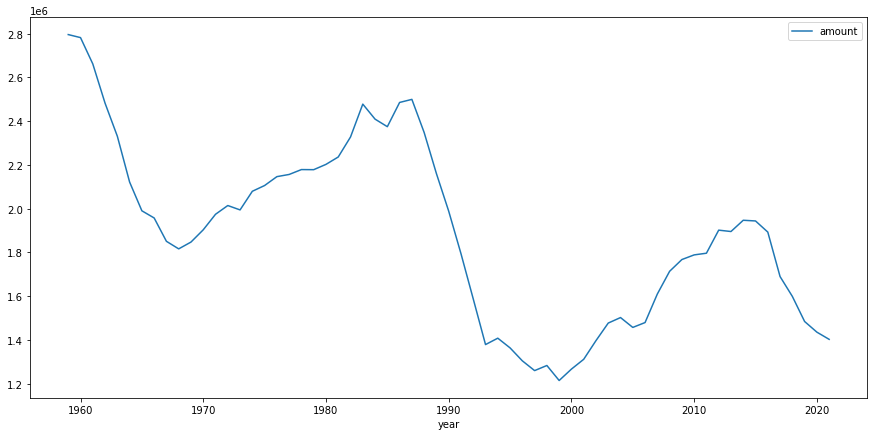

In [39]:

if response.status_code == 200:
    df = pd.read_html(response.text)
    clean_df = df[0][:][1:].copy().rename(columns={0:'year', 1:'amount'})
    clean_df['year'] = clean_df['year'].astype('int')
    clean_df['amount'] = clean_df['amount'].apply(lambda x: x.replace(' ','')).astype('int')
    clean_df.plot(x='year', y='amount', kind='bar', figsize=(15,7))
    clean_df.plot(x='year', y='amount', figsize=(15,7))
else:
    print('Bad response status code:', response.status_code)